In [2]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/wisconsin_breast_cancer_data.csv')
#Drop the empty last column before beginning
df.drop(df.columns[32],axis=1,inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Check for null values
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
#Probably don't need standard error and worst columns
col_names = list(df)
col_names

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [6]:
#Drop index column
df.drop(df.columns[0],axis=1,inplace=True)
#Drop standard error and worst columns (shift column indices to reflect new 0th column)
df.drop(df.columns[11:31],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [16]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_code
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,0.372583
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,0.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,1.000000


In [8]:
#Convert diagnosis to integer coding
#Save integer code to a new column, because we may want original coding for plotting purposes
encoder = preprocessing.OrdinalEncoder()
df[["diagnosis_code"]] = encoder.fit_transform(df[["diagnosis"]])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_code
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1.0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1.0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1.0


In [9]:
#Normalize all numeric data, so that everything is on the same scale
scaler = preprocessing.StandardScaler()
temp = df.iloc[:,1:11].values
temp_scaled = scaler.fit_transform(temp)
df.iloc[:,1:11] = temp_scaled
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_code
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,1.0
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,1.0
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.0
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,1.0
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.0


In [10]:
#One last check for NaN or null values
df.isnull().values.any()

False

In [14]:
df.diagnosis.()

AttributeError: 'Series' object has no attribute 'freq'

In [10]:
#Save out cleaned, curated dataframe
df.to_csv('datasets/wisconsin_breast_cancer_data_refined.csv',index=False)

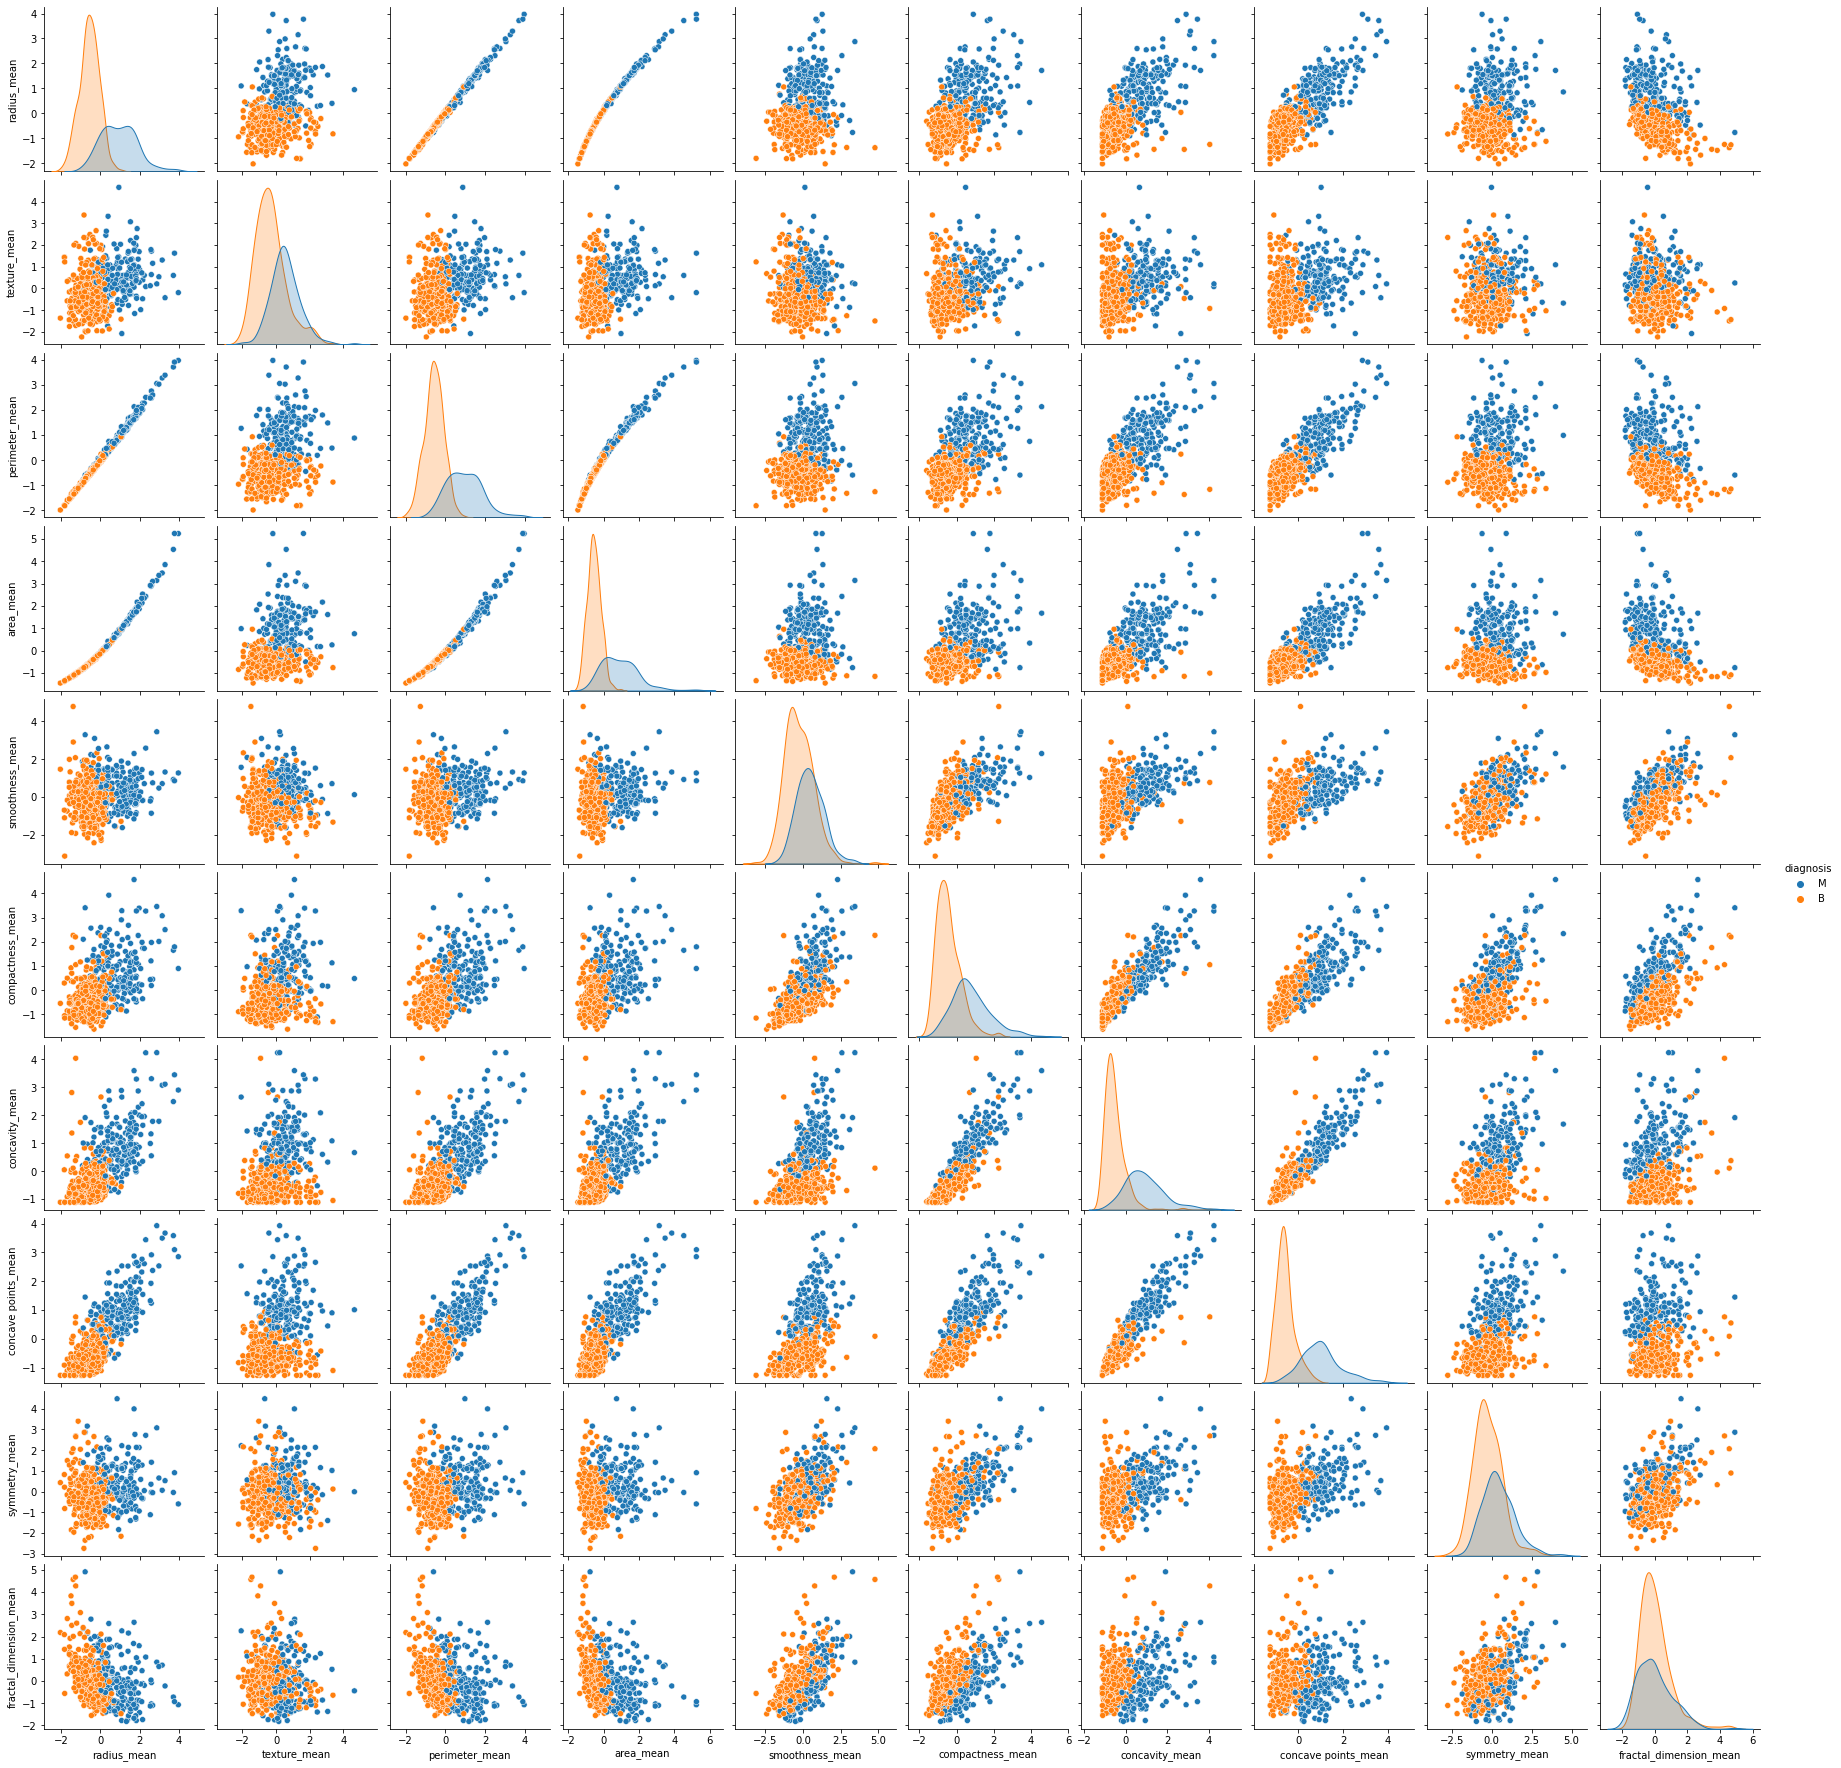

In [19]:
#Use seaborn to create pairplots, color coded by diagnosis
sns.pairplot(df.iloc[:,0:11],hue='diagnosis')

<AxesSubplot:>

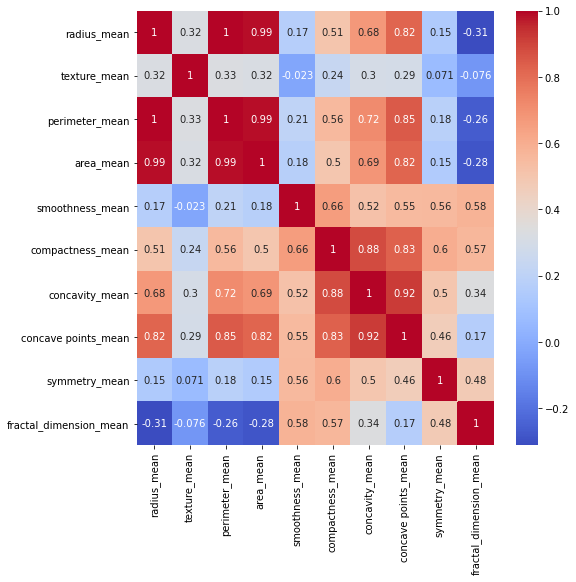

In [22]:
#Plot correlation heatmap
corr = df.iloc[:,1:11].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap="coolwarm",annot=True)

Comment: Based on the correlation heat map, we probably could have been even more conservative when cleaning the initial dataset.  From the near perfect correlation values, we really only needed to keep one of radius_mean, perimeter_mean, or area_mean.  

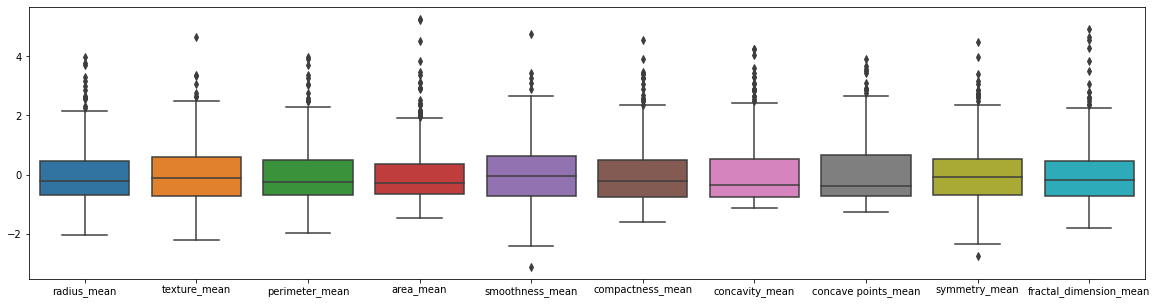

In [36]:
#Boxplots of features
plt.figure(figsize=(20,5))
ax=sns.boxplot(data=df.iloc[:,0:11])

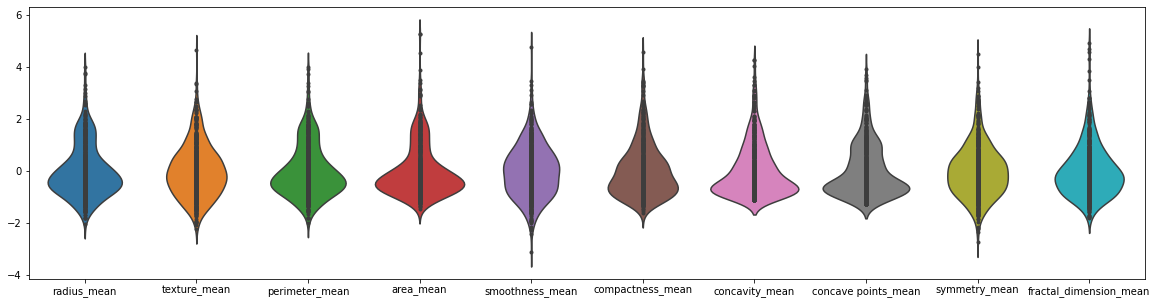

In [51]:
#Violinplots of features
plt.figure(figsize=(20,5))
ax=sns.violinplot(data=df.iloc[:,0:11],inner='points')

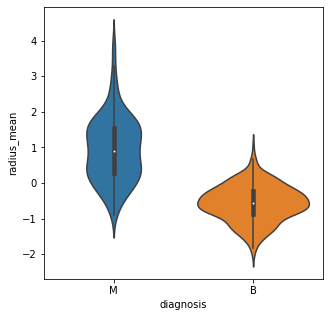

In [50]:
#Violinplot for single feature, splitting by diagnosis
plt.figure(figsize=(5,5))
ax=sns.violinplot(y="radius_mean",x="diagnosis",data=df)

Comment: A violin plot is a special type of box and whisker plot, where the 2D shape of the violin plot reflects the distribution of the data points.  From both first violin plot of all of the features, pretty much all of the features contain data points that could be considered to be outliers, especially on the high end of the measurements.  Only the smoothness_mean and symmetry_mean appear to have outliers on the low end of the measurements.  Potentially complicating the exclusion of outliers is that this dataset includes data coded for two different diagnoses.  From the second violin plot showing radius_mean separated out by diagnosis, the data points that were outliers when considering all data points together are no longer outliers when considering the data points for each diagnosis individually. 